# Projekt

### Spis treści 
<a id="spis"></a>

1. [Generator zbiorow](#generator)
2. [Wybor zbiorow](#ustalenieZbiorow)
3. [Wizualizacja dla algorytmu Jarvisa](#jarvis)

    - [Jarvis dla zbioru typu a](#jarvisa)
    - [Jarvis dla zbioru typu b](#jarvisb)
    - [Jarvis dla zbioru typu c](#jarvisc)
    - [Jarvis dla zbioru typu d](#jarvisd)
    
4. [Wizualizacja dla algorytmu Grahama](#graham)

    - [Graham dla zbioru typu a](#grahama)
    - [Graham dla zbioru typu b](#grahamb)
    - [Graham dla zbioru typu c](#grahamc)
    - [Graham dla zbioru typu d](#grahamd)
    
5. [Wizualizacja dla algorytmu Gorna-dolna](#goradol)

    - [Gorna-dolna dla zbioru typu a](#goradola)
    - [Gorna-dolna dla zbioru typu b](#goradolb)
    - [Gorna-dolna dla zbioru typu c](#goradolc)
    - [Gorna-dolna dla zbioru typu d](#goradold)
    
6. [Wizualizacja dla algorytmu Przyrostowego](#przyrost)

    - [Przyrostowy dla zbioru typu a](#przyrosta)
    - [Przyrostowy dla zbioru typu b](#przyrostb)
    - [Przyrostowy dla zbioru typu c](#przyrostc)
    - [Przyrostowy dla zbioru typu d](#przyrostd)
    
7. [Wizualizacja dla algorytmu Dziel i zwyciezaj](#dziel)
    - [Dziel i zwyciezaj dla zbioru typu a](#dziela)
    - [Dziel i zwyciezaj dla zbioru typu b](#dzielb)
    - [Dziel i zwyciezaj dla zbioru typu c](#dzielc)
    - [Dziel i zwyciezaj dla zbioru typu d](#dzield)
    
8. [Wizualizacja dla algorytmu Chana](#chan)
    - [Chan dla zbioru typu a](#chana)
    - [Chan dla zbioru typu b](#chanb)
    - [Chan dla zbioru typu c](#chanc)
    - [Chan dla zbioru typu d](#chand)
    
9. [Wizualizacja dla algorytmu Quick hull](#quickhull)
    - [Quick hull dla zbioru typu a](#quickhulla)
    - [Quick hull dla zbioru typu b](#quickhullb)
    - [Quick hull dla zbioru typu c](#quickhullc)
    - [Quick hull dla zbioru typu d](#quickhulld)


<a id='section_id'></a>

### Importy
<a id="konfiguracja"></a>

<a id='section_id'></a>

In [21]:
from lib import *
import numpy as np
from vis.divide_conq_vis import divide_conq_vis
from vis.graham_vis import *
from vis.increase_vis import *
from vis.divide_conq_vis import *
from vis.jarvis_vis import *
from vis.lowerupper_vis import *

# Funkcje wizualizujące Łukasza

# wypisywanie otoczek w czytelnej formie
from pprint import pprint
from copy import deepcopy



<a id='section_id'></a>

# Utilities


<a id='section_id'></a>

# Genertor zbiorów punktów

<a id="generator"></a>
[spis treści](#spis)

<a id='section_id'></a>

<a id='section_id'></a>

In [5]:
import random 
import math
def makeAset(n,x1=-100,y1=100,x2=-100,y2=100):
    return [(random.randint(x1,y1), random.randint(x2,y2)) for i in range(n)]

def makeBset(n,xs=0,ys=0,r=100):
    b = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        b.append((r*math.sin(t)-xs, r*math.cos(t)-ys))
    return b
        
def makeCset(n,x1=-100,y1=-100,x2=100,y2=-100,x3=100,y3=100,x4=-100,y4=100): # wierzcholki musza byc podawane 
# kolejno w przeciwnym kierunku do ruchu wskazowek 
# zegara makeCset tworzy wszelakie czworokaty, bioirac pod uwage ze prostokaty moglyby byc przechylone wyznaczanie zbiorow
# punktow dla nich bylo by rownie trudne
    C=[]
    a=np.sqrt((x1-x2)**2+(y1-y2)**2)
    b=np.sqrt((x2-x3)**2+(y2-y3)**2)
    c=np.sqrt((x3-x4)**2+(y3-y4)**2)
    d=np.sqrt((x1-x4)**2+(y1-y4)**2)
    obw=a+b+c+d
    s=random.random()*obw

    for _ in range(n):
        s =random.random() * obw
        if s<=a:
            C.append(((x1+(s/a)*(x2-x1),y1+(y2-y1)*(s/a))))
        elif s<=a+b:
            C.append((x2+(x3-x2)*((s-a)/b),y2+(y3-y2)*((s-a)/b)))
        elif s<=a+b+c:
            C.append((x3+(x4-x3)*((s-a-b)/c),y3+(y4-y3)*((s-b-a)/c)))
        else:
            C.append((x4+(x1-x4)*((s-a-b-c)/d),y4+(y1-y4)*((s-b-a-c)/d)))
    return C

def makeDset(x1=0,y1=0,x2=10,y2=0,x3=10,y3=10,x4=0,y4=10,n1=100,n2=100,n=0):
    if(n!=0):
        n1=n
        n2=n
    D=[]
    D.append((x1,y1))
    D.append((x2,y2))
    D.append((x3,y3))
    D.append((x4,y4))
    a=np.sqrt((x2-x1)**2+(y2-y1)**2)
    d=np.sqrt((x3-x1)**2+(y3-y1)**2)
    
    for _ in range(n1):
        s=random.random()*a
        D.append((x1+(x2-x1)*(s/a),y1+(y2-y1)*(s/a)))
        D.append((x4+(x1-x4)*(s/a),y4+(y1-y4)*(s/a)))
    for _ in range(n2):
        s=random.random()*d
        D.append((x1+(x3-x1)*(s/d),y1+(y3-y1)*(s/d)))
        D.append((x2+(x4-x2)*(s/d),y2+(y4-y2)*(s/d)))
    return D   

<a id='section_id'></a>

## Wybor zbiorow

<a id="ustalenieZbiorow"></a>
[spis treści](#spis)


In [20]:
a=makeAset(n=10)
b=makeBset(n=10)
c=makeCset(n=10)
d=makeDset(n=10)

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja Wizualizacji

<a id="wizualizacja"></a>


<a id='section_id'></a>

## Algorytm Jarvisa

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Jarvis - wizualizacja dla chmury punktów

<a id="jarvisa"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
array([[-92, -58],
       [ 70, -46],
       [ 64,  96],
       [-49,  61]])


<IPython.core.display.Javascript object>


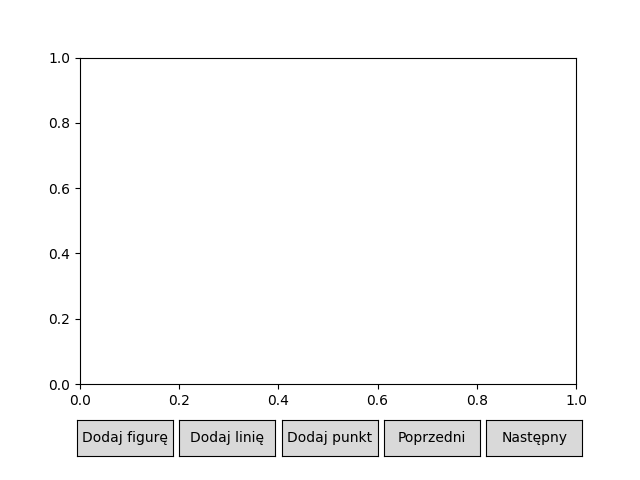

In [4]:
%matplotlib notebook

ch, plot=jarvis_vis(np.array(a))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie kołowym

<a id="jarvisb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
array([[ 29.28515111, -95.61579328],
       [-17.25854242,  98.4994554 ],
       [-23.24340041,  97.26121703],
       [-60.14802595,  79.88876626],
       [-88.30792928,  46.92237874],
       [-98.96725177,  14.33468095],
       [-99.85497539,   5.38366887],
       [-98.63825421, -16.44672629],
       [-62.13617966, -78.35237825],
       [-59.90405123, -80.07187175]])


<IPython.core.display.Javascript object>


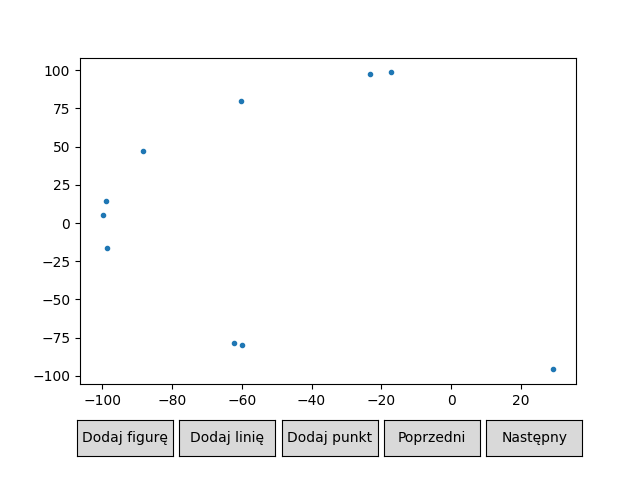

In [5]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(b))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="jarvisc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 7
Punkty otoczki:
array([[ -52.21348791, -100.        ],
       [  51.20962071, -100.        ],
       [ 100.        ,   53.44339302],
       [ -27.73030697,  100.        ],
       [ -49.47950041,  100.        ],
       [-100.        ,   23.36975489],
       [-100.        ,  -66.06626468]])


<IPython.core.display.Javascript object>


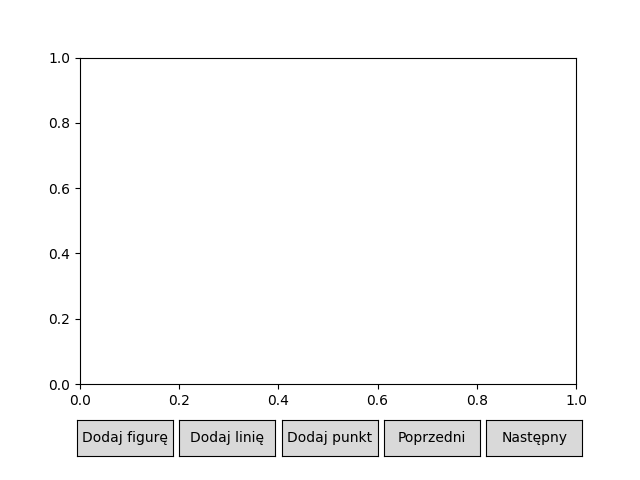

In [6]:
%matplotlib notebook 

ch, plot = jarvis_vis(np.array(c))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="jarvisd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

Liczba punktow otoczki: 4
Punkty otoczki:
array([[ 0.,  0.],
       [10.,  0.],
       [10., 10.],
       [ 0., 10.]])


<IPython.core.display.Javascript object>


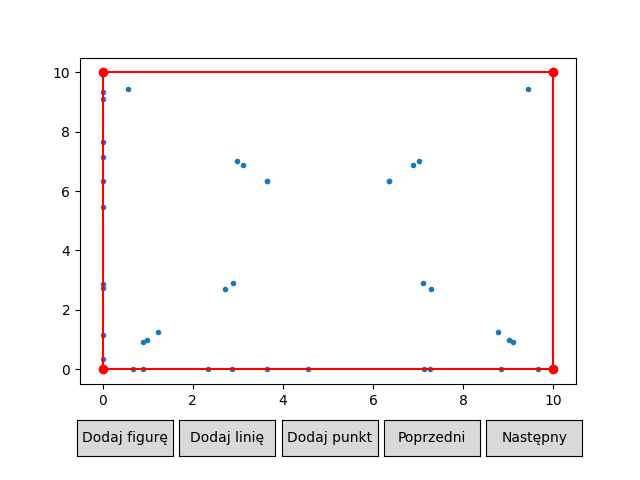

In [7]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(d))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()



<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Grahama

<a id="graham"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod  

<a id='section_id'></a>

### Graham - wizualizacja dla chmury punktów

<a id="grahama"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(-92, -58), (70, -46), (64, 96), (-49, 61)]


<IPython.core.display.Javascript object>


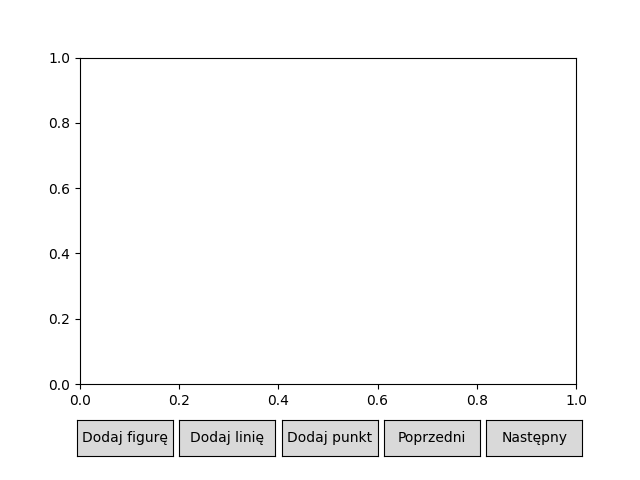

In [8]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()


<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie kołowym

<a id="grahamb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
[(29.285151106965195, -95.61579328041061),
 (-17.258542415065104, 98.49945539802441),
 (-23.24340041056143, 97.26121702587477),
 (-60.148025948986806, 79.88876625934344),
 (-88.3079292789793, 46.92237873828213),
 (-98.96725176511953, 14.334680954225792),
 (-99.85497538703837, 5.383668865556544),
 (-98.63825421452026, -16.446726285546163),
 (-62.13617966395455, -78.35237824577351),
 (-59.90405123458448, -80.07187175084817)]


<IPython.core.display.Javascript object>


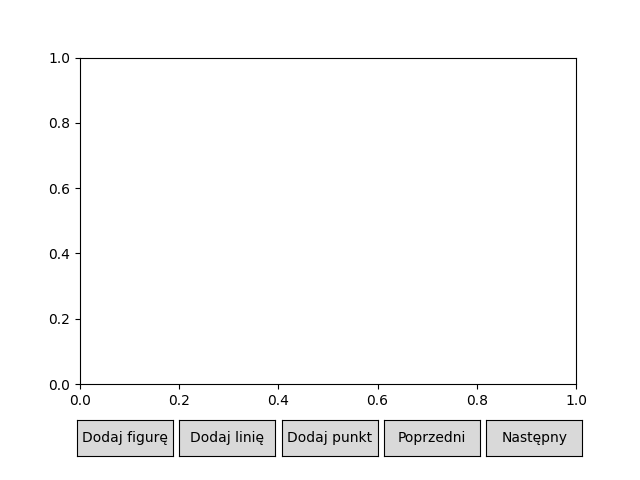

In [9]:
%matplotlib notebook

# przekazujemy kopię listy punktów, poinieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="grahamac"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 7
Punkty otoczki:
[(-52.21348790585054, -100.0),
 (51.20962071158388, -100.0),
 (100.0, 53.443393019283405),
 (-27.730306966594526, 100.0),
 (-49.47950040763351, 100.0),
 (-100.0, 23.36975488851806),
 (-100.0, -66.0662646822941)]


<IPython.core.display.Javascript object>


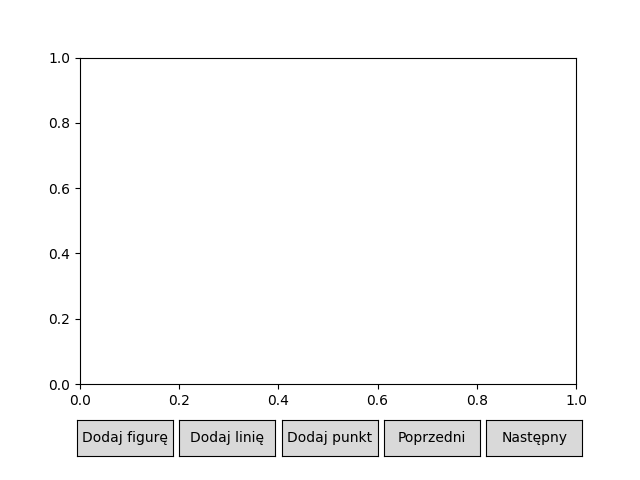

In [10]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot=graham_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="grahamd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)
            

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (10, 0), (10, 10), (0, 10)]


<IPython.core.display.Javascript object>


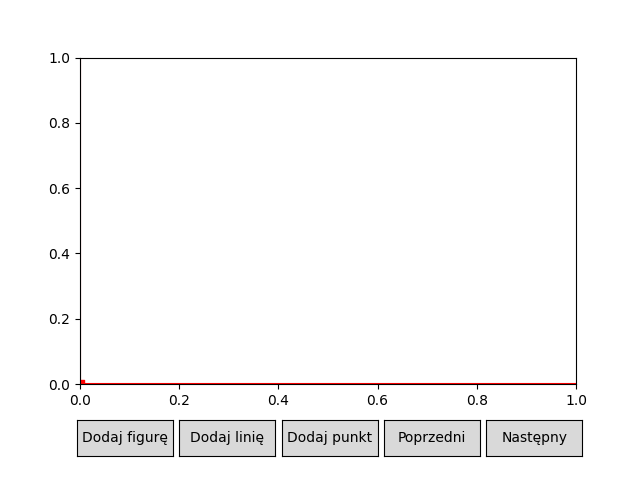

In [11]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm gorna - dolna

<a id="goradol"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla chmury punktów

<a id="goradola"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(-92, -58), (-49, 61), (64, 96), (70, -46)]


<IPython.core.display.Javascript object>


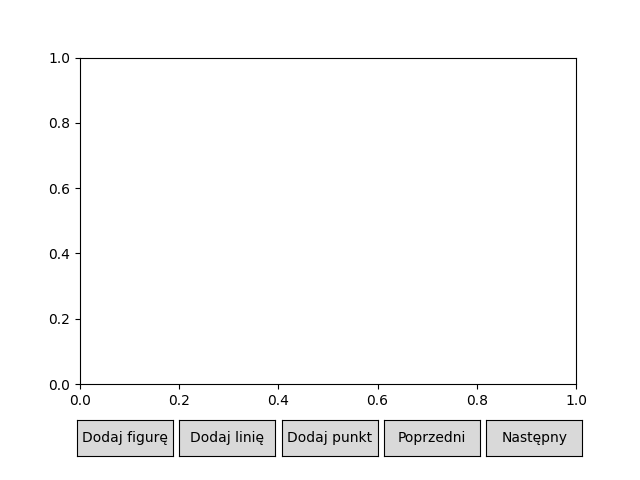

In [12]:
%matplotlib notebook

ch, plot = lower_upper_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie kołowym

<a id="goradolb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
[(-99.85497538703837, 5.383668865556544),
 (-98.96725176511953, 14.334680954225792),
 (-88.3079292789793, 46.92237873828213),
 (-60.148025948986806, 79.88876625934344),
 (-23.24340041056143, 97.26121702587477),
 (-17.258542415065104, 98.49945539802441),
 (29.285151106965195, -95.61579328041061),
 (-59.90405123458448, -80.07187175084817),
 (-62.13617966395455, -78.35237824577351),
 (-98.63825421452026, -16.446726285546163)]


<IPython.core.display.Javascript object>


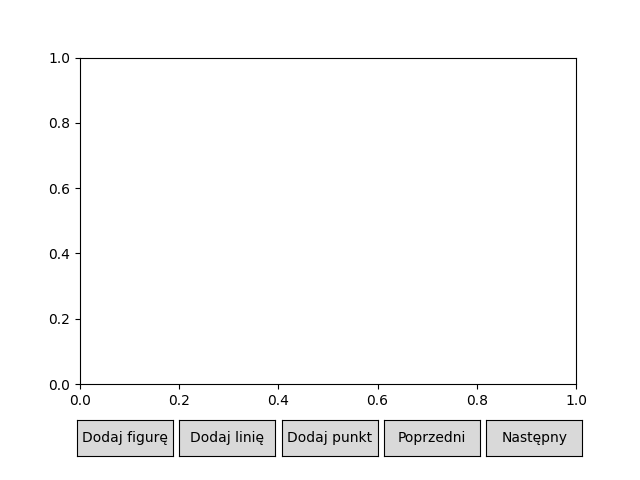

In [13]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="goradolc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 7
Punkty otoczki:
[(-100.0, -66.0662646822941),
 (-100.0, 23.36975488851806),
 (-49.47950040763351, 100.0),
 (-27.730306966594526, 100.0),
 (100.0, 53.443393019283405),
 (51.20962071158388, -100.0),
 (-52.21348790585054, -100.0)]


<IPython.core.display.Javascript object>


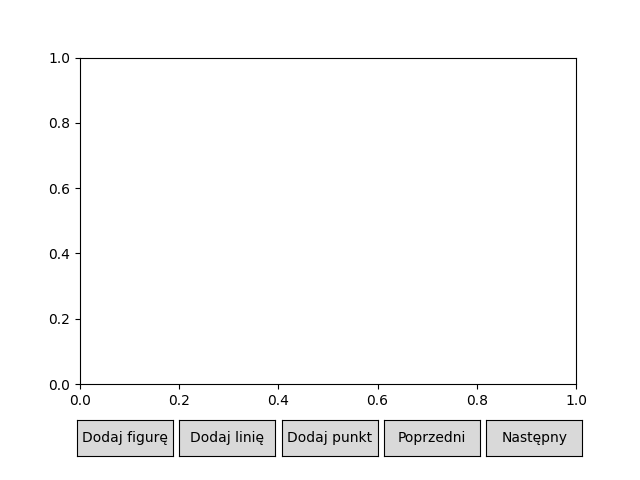

In [14]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="goradold"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (0, 10), (10, 10), (10, 0)]


<IPython.core.display.Javascript object>


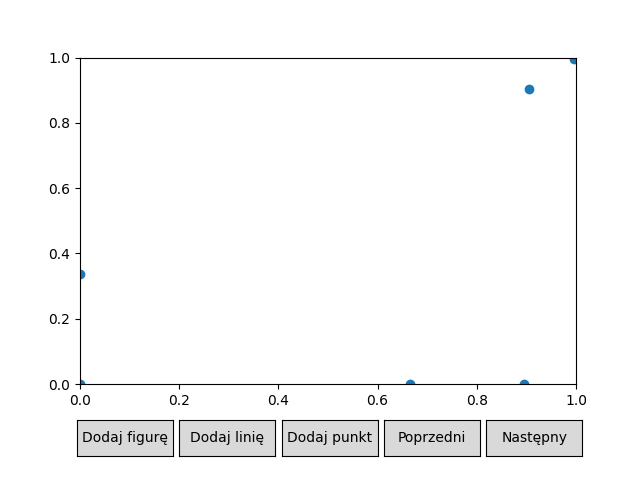

In [15]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm przyrostowy

<a id="przyrost"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla chmury punktów

<a id="przyrosta"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(-92, -58), (70, -46), (64, 96), (-49, 61)]


<IPython.core.display.Javascript object>


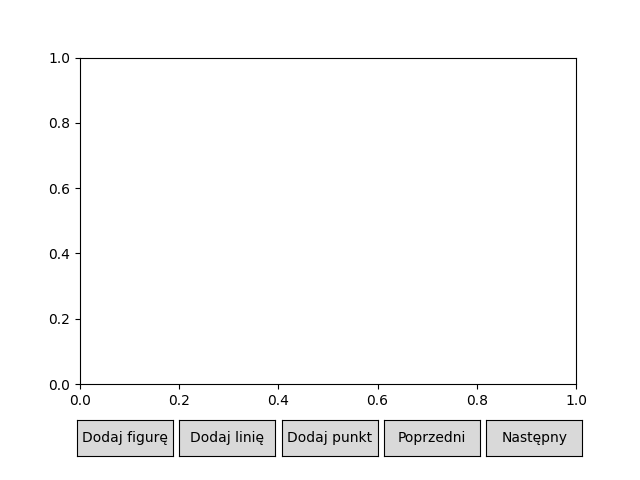

In [16]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 10
Punkty otoczki:
[(-99.85497538703837, 5.383668865556544),
 (-98.63825421452026, -16.446726285546163),
 (-62.13617966395455, -78.35237824577351),
 (-59.90405123458448, -80.07187175084817),
 (29.285151106965195, -95.61579328041061),
 (-17.258542415065104, 98.49945539802441),
 (-23.24340041056143, 97.26121702587477),
 (-60.148025948986806, 79.88876625934344),
 (-88.3079292789793, 46.92237873828213),
 (-98.96725176511953, 14.334680954225792)]


<IPython.core.display.Javascript object>


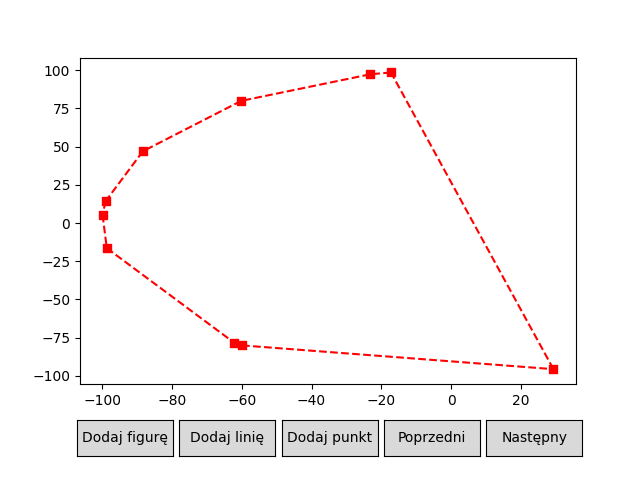

In [17]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [18]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

KeyboardInterrupt: 

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [55]:
%matplotlib notebook

d = makeDset(n=2)
print(d)
ch, plot = increase_with_sorting_vis(d.copy())

# print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()

[(0, 0), (10, 0), (10, 10), (0, 10), (3.3930724648399915, 0.0), (0.0, 6.6069275351600085), (5.918335499909297, 0.0), (0.0, 4.081664500090703), (0.8491655308619472, 0.8491655308619472), (9.150834469138053, 0.8491655308619472), (0.9338551817302865, 0.9338551817302865), (9.066144818269713, 0.9338551817302865)]


KeyboardInterrupt: 

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 9
Punkty otoczki:
[(-100, 99),
 array([-100,  -72]),
 (-97, -99),
 (-73, -100),
 (79, -100),
 (98, -96),
 (99, -31),
 (99, 93),
 (82, 99)]


<IPython.core.display.Javascript object>


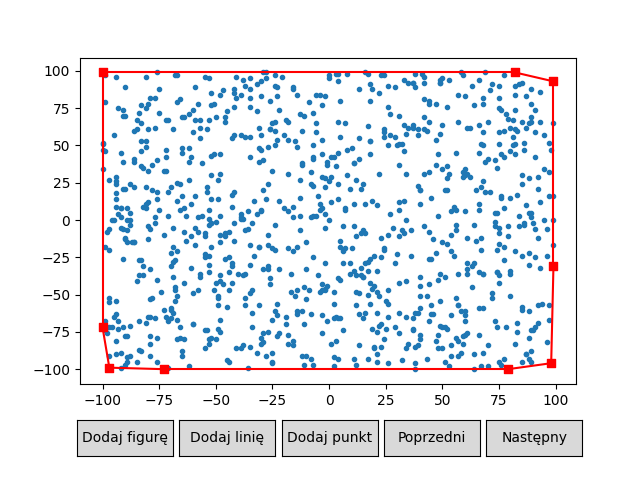

In [22]:
%matplotlib notebook

k = 3 

a = makeAset(n=1000)
ch, plot = divide_conq_vis(a.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla punktów o rozkładzie kołowym

<a id="dzielb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow  otoczki: 10
Punkty otoczki:
[array([-88.30792928,  46.92237874]),
 array([-98.96725177,  14.33468095]),
 array([-99.85497539,   5.38366887]),
 array([-98.63825421, -16.44672629]),
 array([-62.13617966, -78.35237825]),
 array([-59.90405123, -80.07187175]),
 array([ 29.28515111, -95.61579328]),
 array([-17.25854242,  98.4994554 ]),
 array([-23.24340041,  97.26121703]),
 array([-60.14802595,  79.88876626])]


<IPython.core.display.Javascript object>


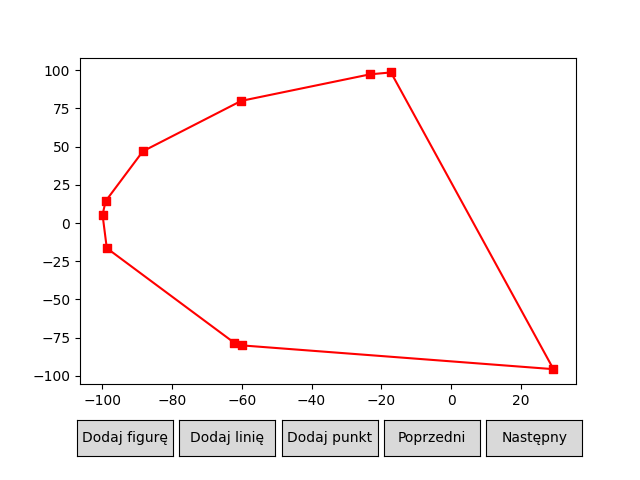

In [20]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(b.copy(), k)

print(f'Liczba punktow  otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="dzielc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:


<IPython.core.display.Javascript object>


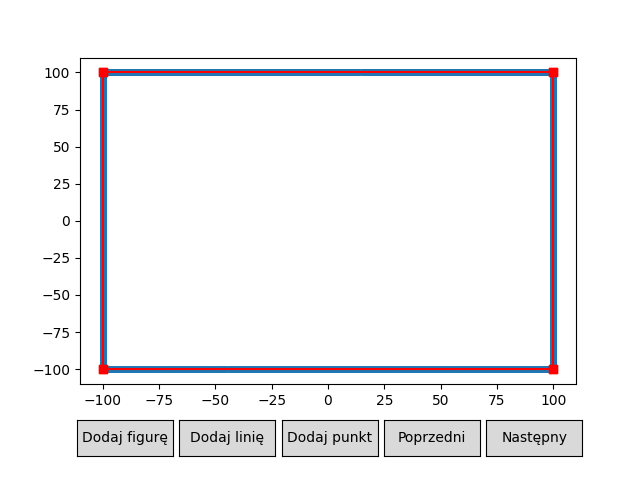

In [21]:
%matplotlib notebook

k = 5

c = makeCset(n = 20000)

ch, plot = divide_conq_vis(c.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()


<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="dzield"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[array([ 0., 10.]), array([0., 0.]), array([10.,  0.]), array([10., 10.])]


<IPython.core.display.Javascript object>


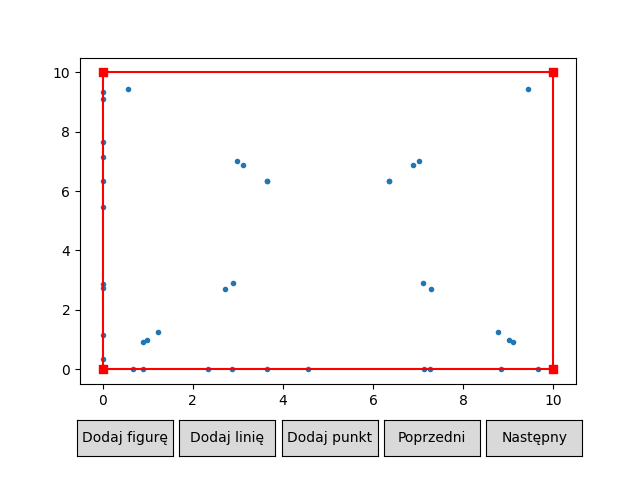

In [22]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(d.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm chana

<a id="chan"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [101]:
from copy import deepcopy
from pure.graham import *

def nextvert(C,curr,plot=None,ans=None,points=None):#dla danego punktu wspolzednymi z Q[i][j] jesli jest to punkt nalezacy do finalnej otoczki, to
    #zwraca nastepny punkt nalezacy do finalnej otoczki zadanego w takich samych wspolzednych Q[nxt[0]][nxt[1]]
    i,j=curr
    nxt=(i,(j+1)%len(C[i]))
    for k in range(len(C)):
        t=tangent(C[i][j],C[k])
        if t== None : 
            continue
        
        if plot!=None:
            plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)), PointsCollection(deepcopy(ans),color='green'),
                                         PointsCollection(deepcopy(C[k]),color='red'),
                                         PointsCollection([C[k][t]],color='firebrick'),
                                        PointsCollection([C[nxt[0]][nxt[1]]],color='violet')],
                                lines=[LinesCollection(makeSheaf(ans),color='yellow'),
                                      LinesCollection([[ans[len(ans)-1],C[nxt[0]][nxt[1]]]],color='violet'),
                                      LinesCollection([[ans[len(ans)-1],C[k][t]]],color='firebrick'),
                                      LinesCollection(makeFullSheaf(C[k]),color='red')]))
        
        if k!=i and compr(C[nxt[0]][nxt[1]],C[k][t],C[i][j])>0 and (k,t)!=(curr):
            nxt=(k,t)
    
    return nxt

def chanUtil(points,m,plot=None):
    Q=divide(points,m)
    C=[]
    for i in range(len(Q)):
        C.append(graham(Q[i]))
        
    if plot!=None:
        pkt=[PointsCollection(deepcopy(Q[i]),color=randomColor()) for i in range(len(Q))]

        plot.add_scene(Scene(points=pkt))
        
        lns=[LinesCollection(makeFullSheaf(C[i]),color=randomColor()) for i in range(len(C))]
        pkt=[PointsCollection(deepcopy(C[i])) for i in range(len(Q))]
        
        plot.add_scene(Scene(points=pkt,lines=lns))
    
    curr=(0,0)
    ans=[]
    i=0
    while i<m:
        ans.append(C[curr[0]][curr[1]])
        if plot!= None :
            plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(ans),color='green')],
                           lines=[LinesCollection(makeSheaf(ans),color='yellow')]))
                               
        nxt=nextvert(C,curr,plot,ans,points)
        if nxt == (0,0):
            return ans
        curr=nxt
        i+=1
        
    
    return None      

def chan(points,visual=False):
    plot=None
    if visual:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(points))])])
    n=len(points)
    m=4
    hoax=None
    while hoax==None:
        hoax=chanUtil(points,m,plot)
        m=min(n,m*m)
    
    if visual == True:
        plot.add_scene(Scene(points=[PointsCollection(a),PointsCollection(hoax,color='green')],
                        lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return hoax

<a id='section_id'></a>

### Chan - wizualizacja dla chmury punktów

<a id="chana"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


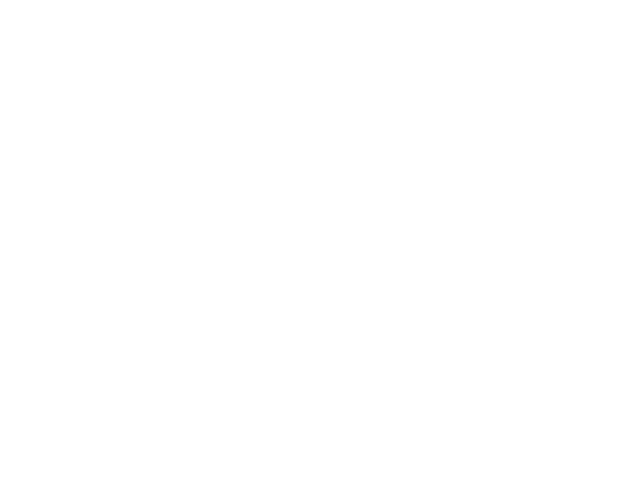

In [102]:
%matplotlib notebook
plot=chan(a,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan  - wizualizacja dla punktów o rozkładzie kołowym

<a id="chanb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


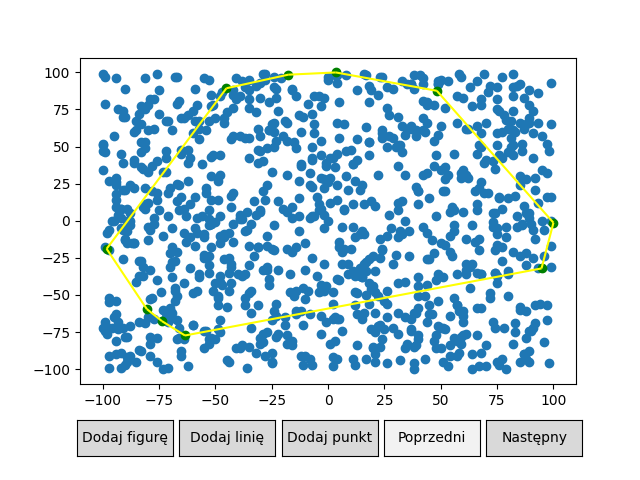

In [103]:
%matplotlib notebook
plot=chan(b,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="chanc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [100]:
%matplotlib notebook
print(len(c))
plot=chan(c,visual=True)
plot.draw()

10


TypeError: chan() got an unexpected keyword argument 'visual'

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="chand"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


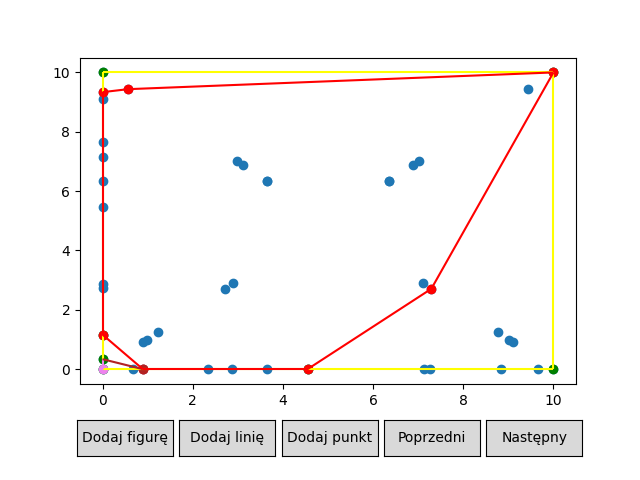

In [28]:
%matplotlib notebook
plot=chan(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm QuickHull

<a id="quickhull"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [29]:
def furthest(a, b, considering):
    n = len(considering)
    i = 0
    ans = None
    while i < n:
        if det(a, b, considering[i]) < 0:  # rozwazany wierzcholek jest po prawej stronie ab
            if ans == None or det(a, b, considering[i]) < det(a, b,
                                                              ans):  # |det(a,b,c)| = 1/2|ab|*h, gdzie h jest wysokoscia z c na ab
                ans = considering[i]
        i += 1
    return ans


def insideTriangle(a, b, c, i):
    if det(a, b, i) >= 0 and det(b, c, i) >= 0 and det(c, a, i) >= 0:
        return True
    return False


def removeInner(a, b, c, considering):
    new=[]
    for i in considering:
        if not insideTriangle(a, b, c, i):
            new.append(i)
    considering.clear()
    considering+=new

def quickHullUtil(a, b, considering,plot=None,hull=None):     
    if len(considering) == 0:
        return []
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
        
    c = furthest(a, b, considering)
    if c == None:
        return []
    considering.remove(c)
    
    if plot!=None :
        hull.append(c)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green'),
                                    PointsCollection([c],color='red')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,c],[b,c]],color='yellow')]))

    removeInner(a, c, b, considering)
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,b],[a,c],[b,c]],color='yellow')]))
    
        z=quickHullUtil(a, c, considering,plot,hull)
        
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[b,c]],color='yellow')]))
        
        return z +[c]+ quickHullUtil(c, b, considering,plot,hull)
    
    return quickHullUtil(a, c, considering) +[c]+ quickHullUtil(c, b, considering)


def quickHull(points,visual=False):
    a = min(points, key=lambda x: x[0])
    b = max(points, key=lambda x: x[0])

    considering = deepcopy(points)
    
    if visual==True:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(considering))])])
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection([a,b],color='red')]))

    considering.remove(a)
    considering.remove(b)
    
    
    if visual:
        hull=[a,b]
        hoax =[a]+quickHullUtil(a, b, considering,plot,hull) +[b] + quickHullUtil(b, a, considering,plot,hull)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(hoax),color='green')],
                           lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return [a]+quickHullUtil(a, b, considering)+[b]+  quickHullUtil(b, a, considering)

<a id='section_id'></a>

### QuickHull - wizualizacja dla chmury punktów

<a id="quickhulla"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


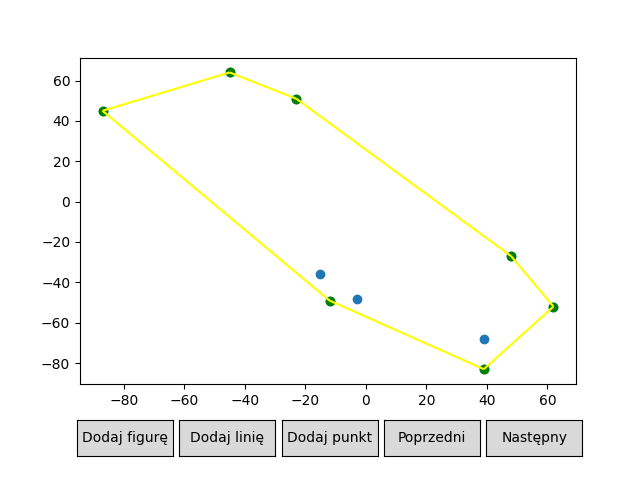

In [30]:
%matplotlib notebook
plot=quickHull(a,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull - wizualizacja dla punktów o rozkładzie kołowym

<a id="quickhullb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


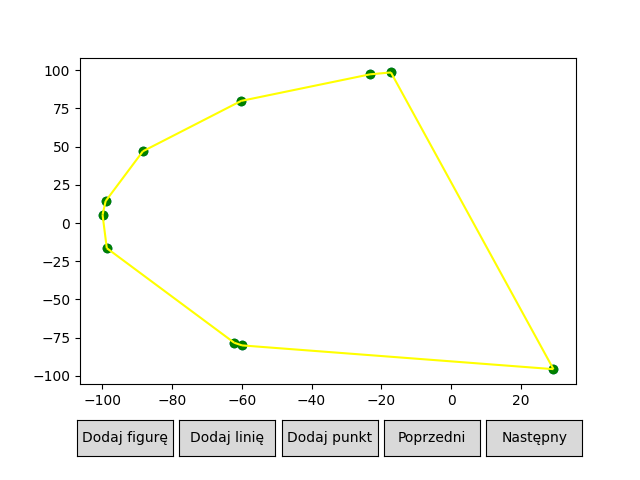

In [31]:
%matplotlib notebook
plot=quickHull(b,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="quickhullc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [32]:
%matplotlib notebook
plot=quickHull(c,visual=True)
plot.draw()

KeyboardInterrupt: 

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="quickhulld"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


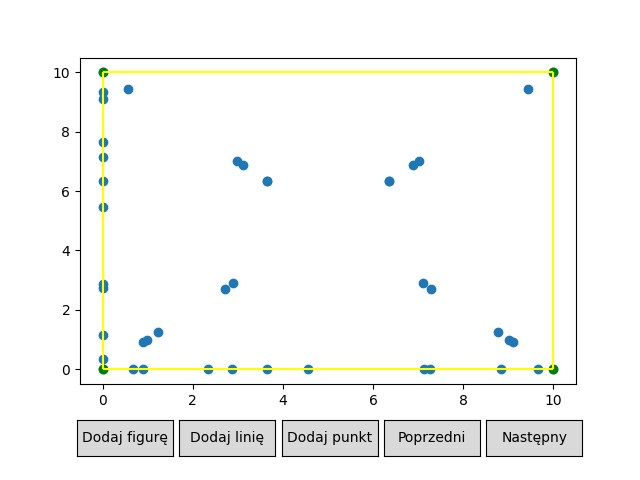

In [33]:
%matplotlib notebook
plot=quickHull(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja pomiarów czasu

<a id="pomiary"></a>


### Funkcja do pomiaru czasów i wizualizacji wyników

<a id='section_id'></a>

In [82]:
import time


from pure.graham import *
from pure.jarvis import *
from pure.divide_conq import *
from pure.chan import *
from pure.increase import *
from pure.lowerupper import *
from pure.quickhull import *

from lib.timemeasure import *

def generate_plot(xdatas, ydatas, xlabel, ylabel, title):
    for xdata, ydata in zip(xdatas, ydatas):
        plt.plot(xdata, ydata, ls = '--')
        plt.scatter(xdata, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

<a id='section_id'></a>

<a id='section_id'></a>

## Zredefiniowane kody funkcji funkcji wyznaczających otoczkę bez wizualizacji - wizualizacja mogła by wpływać na korzyść niektórych i niekorzyść innych. Przed uruchomieniem pomiarów czasu uruchomić komórki z nowymi definicjami.

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

<a id='section_id'></a>

## Pomiary

<a id='section_id'></a>

<a id='section_id'></a>

### Chmura punktów

<a id='section_id'></a>

In [73]:


#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 100 for i in range(10) ]

funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_a = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeAset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_a[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_a[fi][i] = avg_exec_time(func, points=points.copy())
        
#         print(exectimes_a[fi][i])
        
    

    
pprint(exectimes_a)


<function graham at 0x7ff1b9c159d0> 1000
<function lower_upper at 0x7ff1b9c21ee0> 1000
<function chan at 0x7ff1b9c21700> 1000
<function quickHull at 0x7ff1b994f310> 1000
<function jarvis at 0x7ff1b9c15c10> zmieniam na np.array
<function jarvis at 0x7ff1b9c15c10> 1000
<function graham at 0x7ff1b9c159d0> 1100
<function lower_upper at 0x7ff1b9c21ee0> 1100
<function chan at 0x7ff1b9c21700> 1100
<function quickHull at 0x7ff1b994f310> 1100
<function jarvis at 0x7ff1b9c15c10> zmieniam na np.array
<function jarvis at 0x7ff1b9c15c10> 1100
<function graham at 0x7ff1b9c159d0> 1200
<function lower_upper at 0x7ff1b9c21ee0> 1200
<function chan at 0x7ff1b9c21700> 1200
<function quickHull at 0x7ff1b994f310> 1200
<function jarvis at 0x7ff1b9c15c10> zmieniam na np.array
<function jarvis at 0x7ff1b9c15c10> 1200
<function graham at 0x7ff1b9c159d0> 1300
<function lower_upper at 0x7ff1b9c21ee0> 1300
<function chan at 0x7ff1b9c21700> 1300
<function quickHull at 0x7ff1b994f310> 1300
<function jarvis at 0x7ff1

### Algorytm Grahama

<IPython.core.display.Javascript object>


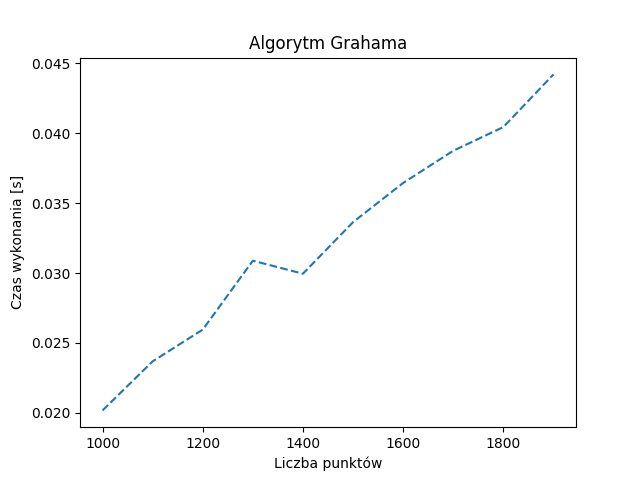

In [76]:
%matplotlib notebook


generate_plot([ns], [exectimes_a[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"

<IPython.core.display.Javascript object>


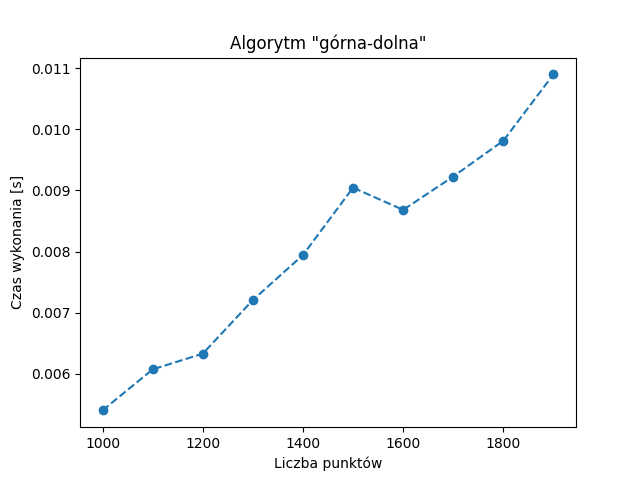

In [61]:
%matplotlib notebook


generate_plot([ns], [exectimes_a[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

<IPython.core.display.Javascript object>


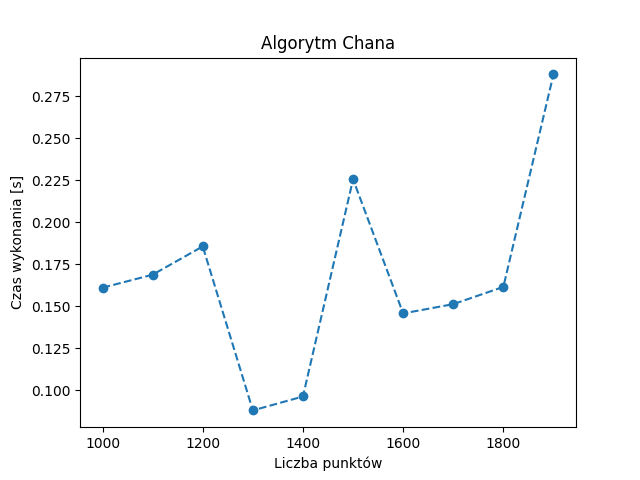

In [62]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

<IPython.core.display.Javascript object>


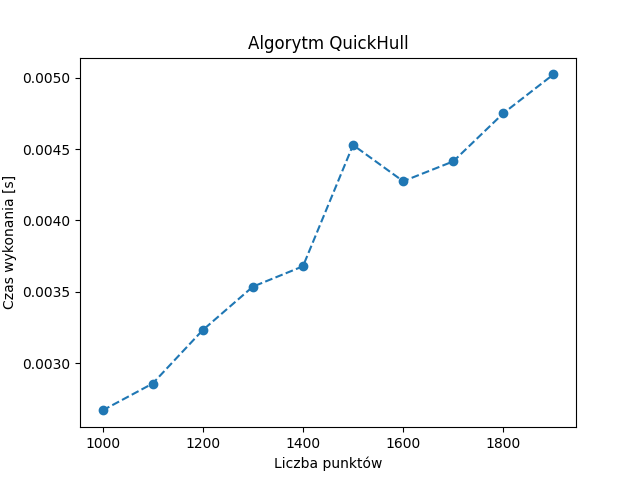

In [64]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

<IPython.core.display.Javascript object>


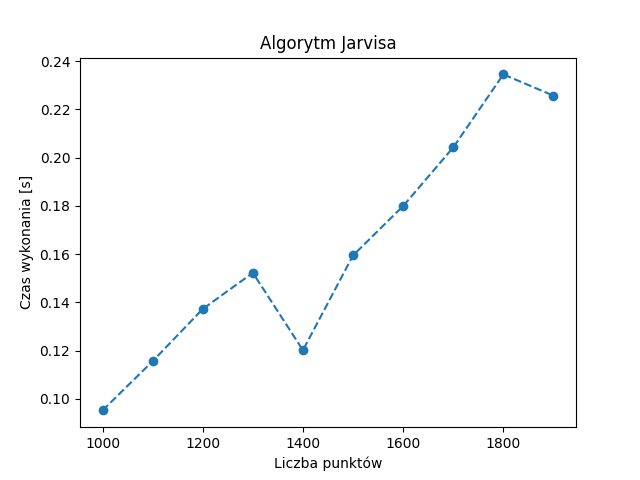

In [65]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Zbiorczy

<IPython.core.display.Javascript object>


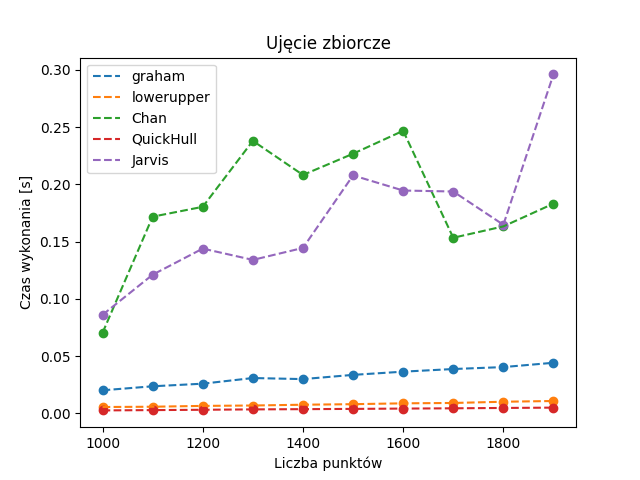

In [83]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_a))], exectimes_a, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

<a id='section_id'></a>

### Rozkład kołowy

<a id='section_id'></a>

In [84]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_b = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeBset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_b[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_b[fi][i] = avg_exec_time(func, points=points.copy())
        
    
pprint(exectimes_b)

<function graham at 0x7ff1b9c159d0> 1000
<function lower_upper at 0x7ff1b9c21ee0> 1000
<function chan at 0x7ff1b9c21700> 1000
<function quickHull at 0x7ff1b994f310> 1000
<function jarvis at 0x7ff1b9c15c10> zmieniam na np.array
<function jarvis at 0x7ff1b9c15c10> 1000
<function graham at 0x7ff1b9c159d0> 1100
<function lower_upper at 0x7ff1b9c21ee0> 1100
<function chan at 0x7ff1b9c21700> 1100
<function quickHull at 0x7ff1b994f310> 1100
<function jarvis at 0x7ff1b9c15c10> zmieniam na np.array
<function jarvis at 0x7ff1b9c15c10> 1100
<function graham at 0x7ff1b9c159d0> 1200
<function lower_upper at 0x7ff1b9c21ee0> 1200
<function chan at 0x7ff1b9c21700> 1200
<function quickHull at 0x7ff1b994f310> 1200
<function jarvis at 0x7ff1b9c15c10> zmieniam na np.array
<function jarvis at 0x7ff1b9c15c10> 1200
<function graham at 0x7ff1b9c159d0> 1300
<function lower_upper at 0x7ff1b9c21ee0> 1300
<function chan at 0x7ff1b9c21700> 1300
<function quickHull at 0x7ff1b994f310> 1300
<function jarvis at 0x7ff1

<a id='section_id'></a>

### Algorytm Grahama

<IPython.core.display.Javascript object>


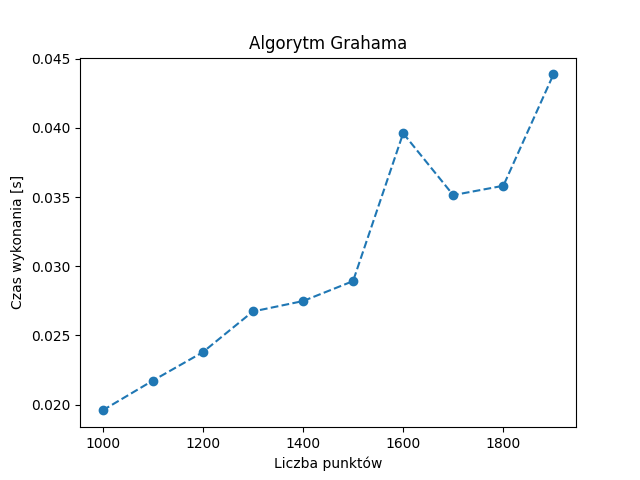

In [85]:
%matplotlib notebook


generate_plot([ns], [exectimes_b[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algortym "górna-dolna"

<IPython.core.display.Javascript object>


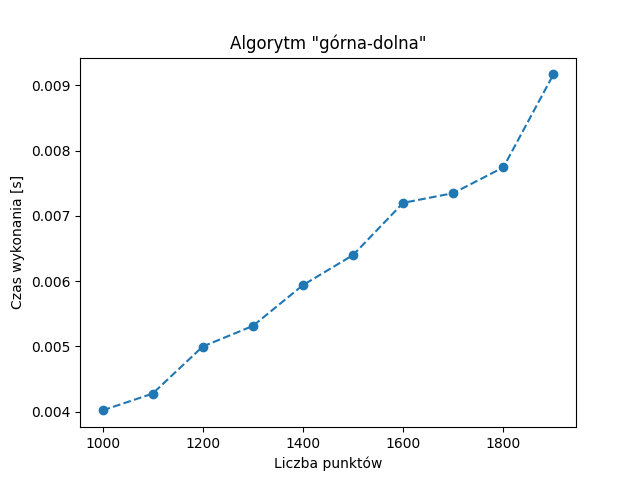

In [86]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana

<IPython.core.display.Javascript object>


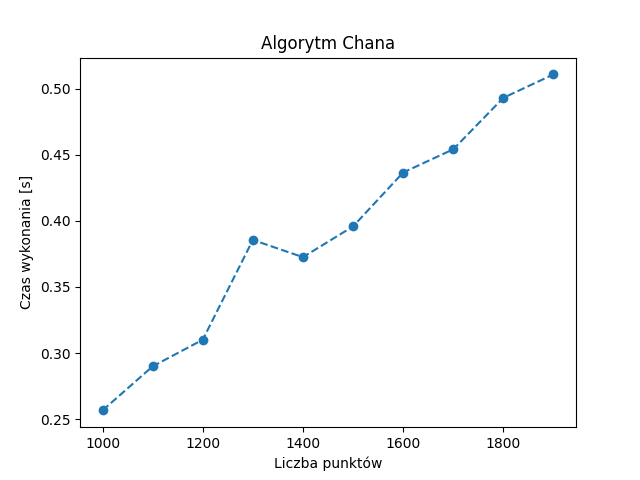

In [89]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull

<IPython.core.display.Javascript object>


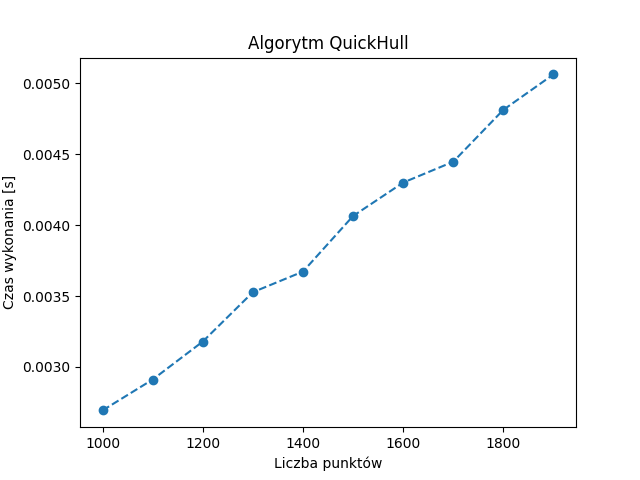

In [90]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm Jarvisa

<IPython.core.display.Javascript object>


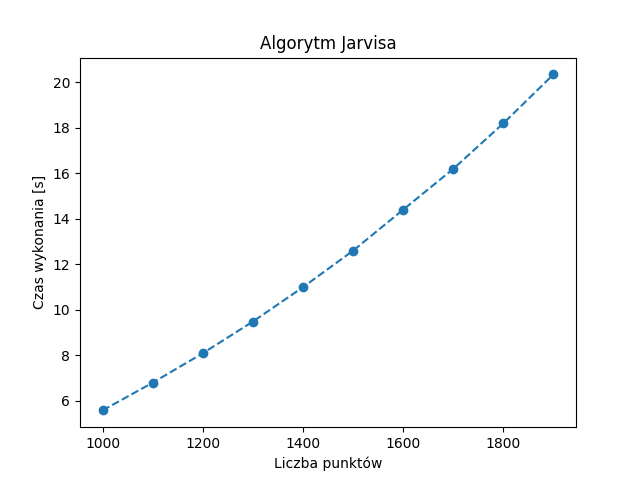

In [91]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze

<IPython.core.display.Javascript object>


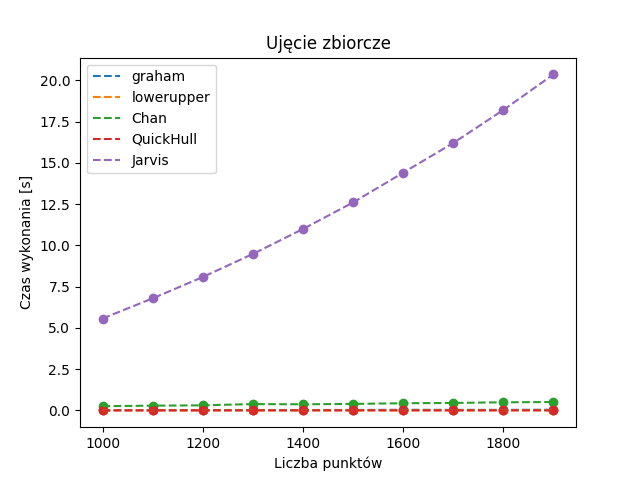

In [92]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b))], exectimes_b, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

### Ujęcie zbiorcze bez algorytmu Jarvisa

<IPython.core.display.Javascript object>


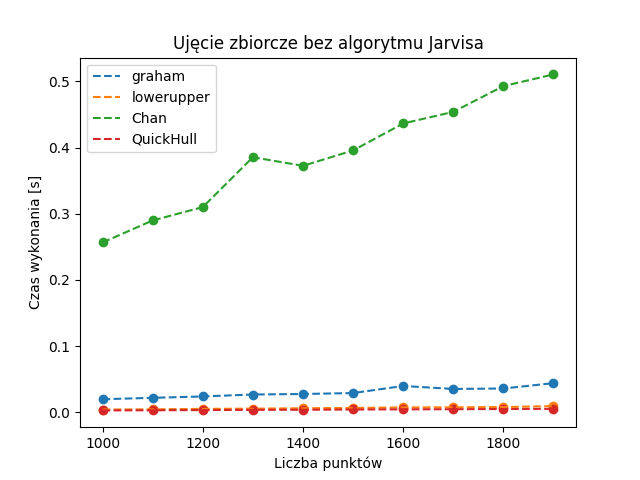

In [97]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b) - 1)], exectimes_b[:len(exectimes_b)-1], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze bez algorytmu Jarvisa')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull'))
plt.show()

### Losowy rozkład na prostokącie

<a id='section_id'></a>

In [99]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, jarvis]

exectimes_c = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeCset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_c[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_c[fi][i] = avg_exec_time(func, points=points.copy())
        
    
pprint(exectimes_c)

<function graham at 0x7ff1b9c159d0> 1000
<function lower_upper at 0x7ff1b9c21ee0> 1000
<function chan at 0x7ff1b9c21700> 1000


KeyboardInterrupt: 

<a id='section_id'></a>

### Wierzchołki kwadratu, jego przekątne i dwa boki o wspólnym wierzchołku

<a id='section_id'></a>

<a id='section_id'></a>